# Feature Engineering

### Packages and Dependencies

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import MinMaxScaler

import nltk
nltk.download('stopwords')

from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.probability import FreqDist
from nltk.stem import PorterStemmer

from textblob import TextBlob
from textblob import Word

stop = stopwords.words('english')

pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)

[nltk_data] Downloading package stopwords to /home/tom/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


### Load Data

In [2]:
main = pd.read_csv('main.csv').drop('Unnamed: 0', 1)

/home/tom/anaconda3/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3058: DtypeWarning: Columns (352,353,360,361,363,365,366,367,368,369,370,371,376,377) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


### Inspect

In [3]:
main.head(1)

,level_0,ep_id,full_name,date_of_birth,hometown,country,youth_team,position,height,weight,shoots,status,scout_text,regular_gp_17,regular_gp_18,regular_gp_19,regular_gp_20,regular_gp_21,regular_gp_22,regular_gp_23,regular_gp_24,regular_gp_25,regular_gp_26,regular_gp_27,regular_gp_28,regular_g_17,regular_g_18,regular_g_19,regular_g_20,regular_g_21,regular_g_22,regular_g_23,regular_g_24,regular_g_25,regular_g_26,regular_g_27,regular_g_28,regular_a_17,regular_a_18,regular_a_19,regular_a_20,regular_a_21,regular_a_22,regular_a_23,regular_a_24,regular_a_25,regular_a_26,regular_a_27,regular_a_28,regular_pim_17,regular_pim_18,regular_pim_19,regular_pim_20,regular_pim_21,regular_pim_22,regular_pim_23,regular_pim_24,regular_pim_25,regular_pim_26,regular_pim_27,regular_pim_28,regular_pm_17,regular_pm_18,regular_pm_19,regular_pm_20,regular_pm_21,regular_pm_22,regular_pm_23,regular_pm_24,regular_pm_25,regular_pm_26,regular_pm_27,regular_pm_28,playoffs_gp_17,playoffs_gp_18,playoffs_gp_19,playoffs_gp_20,playoffs_gp_21,playoffs_gp_22,playoffs_gp_23,playoffs_gp_24,playoffs_gp_25,playoffs_gp_26,playoffs_gp_27,playoffs_gp_28,playoffs_g_17,playoffs_g_18,playoffs_g_19,playoffs_g_20,playoffs_g_21,playoffs_g_22,playoffs_g_23,playoffs_g_24,playoffs_g_25,playoffs_g_26,playoffs_g_27,playoffs_g_28,playoffs_a_17,playoffs_a_18,playoffs_a_19,playoffs_a_20,playoffs_a_21,playoffs_a_22,playoffs_a_23,playoffs_a_24,playoffs_a_25,playoffs_a_26,playoffs_a_27,playoffs_a_28,playoffs_pim_17,playoffs_pim_18,playoffs_pim_19,playoffs_pim_20,playoffs_pim_21,playoffs_pim_22,playoffs_pim_23,playoffs_pim_24,playoffs_pim_25,playoffs_pim_26,playoffs_pim_27,playoffs_pim_28,playoffs_pm_17,playoffs_pm_18,playoffs_pm_19,playoffs_pm_20,playoffs_pm_21,playoffs_pm_22,playoffs_pm_23,playoffs_pm_24,playoffs_pm_25,playoffs_pm_26,playoffs_pm_27,playoffs_pm_28,award_count_17,award_count_18,award_count_19,award_count_20,award_count_21,award_count_22,award_count_23,award_count_24,award_count_25,award_count_26,award_count_27,award_count_28,regular_gp_16,regular_gp_29,regular_gp_30,regular_gp_31,regular_gp_32,regular_gp_33,regular_gp_34,regular_gp_35,regular_g_16,regular_g_29,regular_g_30,regular_g_31,regular_g_32,regular_g_33,regular_g_34,regular_g_35,regular_a_16,regular_a_29,regular_a_30,regular_a_31,regular_a_32,regular_a_33,regular_a_34,regular_a_35,regular_pim_16,regular_pim_29,regular_pim_30,regular_pim_31,regular_pim_32,regular_pim_33,regular_pim_34,regular_pim_35,regular_pm_16,regular_pm_29,regular_pm_30,regular_pm_31,regular_pm_32,regular_pm_33,regular_pm_34,regular_pm_35,playoffs_gp_16,playoffs_gp_29,playoffs_gp_30,playoffs_gp_31,playoffs_gp_32,playoffs_gp_33,playoffs_gp_34,playoffs_gp_35,playoffs_g_16,playoffs_g_29,playoffs_g_30,playoffs_g_31,playoffs_g_32,playoffs_g_33,playoffs_g_34,playoffs_g_35,playoffs_a_16,playoffs_a_29,playoffs_a_30,playoffs_a_31,playoffs_a_32,playoffs_a_33,playoffs_a_34,playoffs_a_35,playoffs_pim_16,playoffs_pim_29,playoffs_pim_30,playoffs_pim_31,playoffs_pim_32,playoffs_pim_33,playoffs_pim_34,playoffs_pim_35,playoffs_pm_16,playoffs_pm_29,playoffs_pm_30,playoffs_pm_31,playoffs_pm_32,playoffs_pm_33,playoffs_pm_34,playoffs_pm_35,award_count_16,award_count_29,award_count_30,award_count_31,award_count_32,award_count_33,award_count_34,award_count_35,regular_gp_15,regular_gp_36,regular_g_15,regular_g_36,regular_a_15,regular_a_36,regular_pim_15,regular_pim_36,regular_pm_15,regular_pm_36,playoffs_gp_15,playoffs_gp_36,playoffs_g_15,playoffs_g_36,playoffs_a_15,playoffs_a_36,playoffs_pim_15,playoffs_pim_36,playoffs_pm_15,playoffs_pm_36,award_count_15,award_count_36,regular_gp_37,regular_gp_38,regular_gp_39,regular_g_37,regular_g_38,regular_g_39,regular_a_37,regular_a_38,regular_a_39,regular_pim_37,regular_pim_38,regular_pim_39,regular_pm_37,regular_pm_38,regular_pm_39,playoffs_gp_37,playoffs_gp_38,playoffs_gp_39,playoffs_g_37,playoffs_g_38,playoffs_g_39,playoffs_a_37,playoffs_a_38,playoffs_a_39,playoffs_pim_37,playoffs_pim_38,playoffs_pim_39,playoffs_pm_37,playoffs_p

### Refactor league_25 as the response

In [4]:
replacements = {
    np.nan: 'Not Active',
    0: 'Not Active',
    'ECHL': 'Lower',
    'AHL': 'Lower',
    'USports': 'Lower',
    'NCHL': 'Lower',
    'LHSAM': 'Lower',
    'LHCS': 'Lower',
    'LNAH': 'Lower',
    'CHL': 'Lower',
    'NCHL-MB': 'Lower',
    'NLSHL': 'Lower',
    'SPHL': 'Lower',
    'LHSR': 'Lower',
    'LHSCE': 'Lower',
    'SEMHL': 'Lower',
    'NESHL': 'Lower',
    'WOAA': 'Lower',
    'HHL': 'Lower',
    'CRL': 'Lower',
    'FPHL': 'Lower',
    'Chinook HL': 'Lower',
    'FHL': 'Lower',
    'LHSAAAQ': 'Lower',
    'BSHL': 'Lower',
    'NPHL-Sr.': 'Lower',
    'WMHL': 'Lower',
    'ACHW': 'Lower',
    'GLHL': 'Lower',
    'RHL': 'Lower',
    'ACAC': 'Lower',
    'SVHL': 'Lower',
    'SWHL': 'Lower',
    'BCIHL': 'Lower',
    'QVHL': 'Lower',
    'WCSHL': 'Lower',
    'LHBBF': 'Lower',
    'OHL': 'Lower',
    'BRHL': 'Lower',
    'FCHL': 'Lower',
    'THHL': 'Lower',
    'ACHA II': 'Lower',
    'LHSLF': 'Lower',
    'CIHL': 'Lower',
    'LRH': 'Lower',
    'NSHL-Sr.': 'Lower',
    'LHSEQ': 'Lower',
    'ACH': 'Lower',
    'IHL': 'Lower',
    'MSHL': 'Lower',
    'SASHL': 'Lower',
    'CSHL-Sr.': 'Lower',
    'USHL': 'Lower',
    'OWSHL': 'Lower',
    'LLHL': 'Lower',
    'CWSHL': 'Lower',
    'LHSBEQ': 'Lower',
    'QSCHL': 'Lower',
    'LHSAO': 'Lower',
    'ASHL': 'Lower',
    'NCAA III': 'Lower',
    'THL': 'Lower',
    'AAHL': 'Lower',
    'Notekeu HL': 'Lower',
    'QMJHL': 'Lower',
    'ACHA III': 'Lower',
    'LHSCN': 'Lower',
    'EPHL': 'Lower',
    'SHL': 'Lower',
    'NLA': 'Lower', 
    'Russia': 'Lower', 
    'Germany3': 'Lower',
    'Germany2': 'Lower',
    'NLB': 'Lower',
    'EIHL': 'Lower',
    'KHL': 'Lower',
    'France': 'Lower',
    'Italy': 'Lower',
    'DEL': 'Lower',
    'EBEL': 'Lower',
    'Netherlands': 'Lower', 
    'Czech': 'Lower',
    'Slovakia': 'Lower',
    'Liiga': 'Lower', 
    'Allsvenskan': 'Lower',
    'Czech2': 'Lower',
    'Norway': 'Lower', 
    'Germany5': 'Lower', 
    'Denmark': 'Lower',
    'Belarus': 'Lower',
    'DEL2': 'Lower',
    'VHL': 'Lower',
    'Slovakia2': 'Lower',
    'Division 1': 'Lower', 
    'NZIHL': 'Lower', 
    'AlpsHL': 'Lower', 
    'Czech3': 'Lower',
    'NIHL 1': 'Lower',
    'Asia League': 'Lower',
    'Kazakhstan': 'Lower',
    'France2': 'Lower',
    'Serbia': 'Lower',
    'Czech4': 'Lower',
    'Division 2': 'Lower',
    'NCAA': 'Lower',
    'AIHL': 'Lower',
    'EPIHL': 'Lower',
    'France3': 'Lower',
    'Poland': 'Lower',
    'International': 'Lower',
    'Italy2': 'Lower', 
    'UHL': 'Lower',
    'Russia2': 'Lower',
    'MLH': 'Lower',
    'Russia3': 'Lower', 
    'Erste Liga': 'Lower', 
    'SwissDiv1': 'Lower',
    'Suomi-sarja': 'Lower',
    'Mestis': 'Lower',
    'Germany4': 'Lower', 
    'EOSHL-Sr': 'Lower', 
    'ULLH': 'Lower',
    'CIHL HK': 'Lower', 
    'ECSHL': 'Lower',
    'Spain': 'Lower',
    'Latvia': 'Lower'
}

main['response'] = main['league_25'].replace(replacements)

In [5]:
main['response'].unique()

array(['Lower', 'NHL', 'Not Active'], dtype=object)

### Refactor country as birth_region

In [6]:
main['country'] = main['country'].str.extract(r'(\w+)\s')

In [7]:
main['country'].unique()

array([nan, 'Canada', 'USA', 'Czech', 'Hungary', 'Germany', 'South',
       'Switzerland', 'Austria', 'Kazakhstan', 'England', 'Russia',
       'Netherlands', 'Serbia', 'Turkey', 'Denmark', 'Sweden', 'Italy',
       'France', 'Croatia', 'Belarus', 'Poland', 'Norway', 'Finland',
       'Latvia', 'Belgium', 'Portugal', 'Slovakia'], dtype=object)

In [8]:
regions = {
    'Czech': 'Eastern Europe',
    'Sweden': 'Scandanavia',
    'Germany': 'Western Europe',
    'Slovakia': 'Eastern Europe',
    'Finland': 'Scandanavia',
    'Italy': 'Western Europe',
    'Norway': 'Scandanavia',
    'Switzerland': 'Western Europe',
    'Latvia': 'Eastern Europe',
    'Ukraine': 'Eastern Europe',
    'Denmark': 'Scandanavia',
    'Hungary': 'Eastern Europe',
    'Belarus': 'Eastern Europe',
    'Kazakhstan': 'Eastern Europe',
    'Slovenia': 'Eastern Europe',
    'U': 'Western Europe', # U is United Kingdom (UK)
    'Austria': 'Western Europe',
    'France': 'Western Europe',
    'South': 'Asia',
    'Croatia': 'Eastern Europe',
    'Israel': 'Eastern Europe',
    'Poland': 'Eastern Europe',
    'England': 'Western Europe',
    'Japan': 'Asia',
    'Netherlands': 'Western Europe',
    np.nan: 'Canada',
    'Serbia': 'Eastern Europe',
    'Turkey': 'Eastern Europe',
    'Belgium': 'Western Europe',
    'Portugal': 'Western Europe'
}

main['birth_region'] = main['country'].replace(regions)

In [9]:
main['birth_region'].unique()

array(['Canada', 'USA', 'Eastern Europe', 'Western Europe', 'Asia',
       'Russia', 'Scandanavia'], dtype=object)

### Manage position

In [10]:
main['position'].unique()

array(['C', 'RW', 'C/LW', 'LW/C', 'LW', 'C/RW', 'F', 'LW/RW', 'D', 'W/C',
       'C/W', 'RW/LW', 'C/D', 'D/C', 'RW/C', 'RW/D', 'D/W', 'D/LW',
       'D/RW', 'D/F', 'LW/D', 'C/RW/D', 'F/D', 'F/RW', 'W/D', 'LW/C/D',
       'W'], dtype=object)

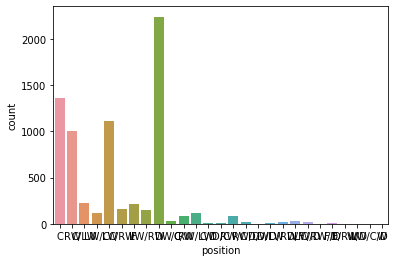

In [11]:
sns.countplot(main['position'])

In [12]:
positions = {
    'RW/C': 'Forward',
    'C/LW': 'Forward',
    'RW/LW': 'Winger',
    'D/F': 'Mixed',
    'F': 'Forward',
    'LW/D': 'Mixed',
    'C/RW': 'Forward',
    'LW/RW': 'Forward',
    'LW/C': 'Forward',
    'LW/C/D': 'Mixed',
    'D/W': 'Mixed',
    'W/C/D': 'Mixed',
    'W/C': 'Forward',
    'C/W': 'Forward',
    'D/RW': 'Mixed',
    'F/D': 'Mixed',
    'D/LW': 'Mixed',
    'RW/D': 'Mixed',
    'D/C': 'Mixed',
    'C/RW/D': 'Mixed',
    'W/D': 'Mixed',
    'W': 'Forward',
    'C/D': 'Mixed',
    'F/RW': 'Forward'
}

main['position'] = main['position'].replace(positions)

In [13]:
main['position'].unique()

array(['C', 'RW', 'Forward', 'LW', 'D', 'Winger', 'Mixed'], dtype=object)

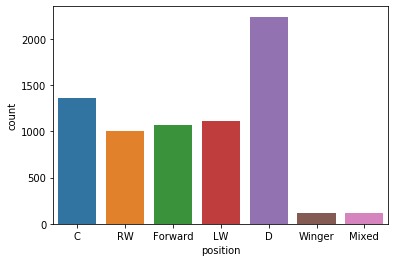

In [14]:
sns.countplot(main['position'])

### Subset and reorder

In [15]:
columns = sorted([i for i in main.columns.unique()])
columns

['award_count_12',
 'award_count_13',
 'award_count_14',
 'award_count_15',
 'award_count_16',
 'award_count_17',
 'award_count_18',
 'award_count_19',
 'award_count_20',
 'award_count_21',
 'award_count_22',
 'award_count_23',
 'award_count_24',
 'award_count_25',
 'award_count_26',
 'award_count_27',
 'award_count_28',
 'award_count_29',
 'award_count_30',
 'award_count_31',
 'award_count_32',
 'award_count_33',
 'award_count_34',
 'award_count_35',
 'award_count_36',
 'award_count_37',
 'award_count_38',
 'award_count_39',
 'birth_region',
 'country',
 'date_of_birth',
 'ep_id',
 'full_name',
 'height',
 'hometown',
 'inter_award_count_14',
 'inter_award_count_15',
 'inter_award_count_16',
 'inter_award_count_17',
 'inter_award_count_18',
 'inter_regular_a_14',
 'inter_regular_a_15',
 'inter_regular_a_16',
 'inter_regular_a_17',
 'inter_regular_a_18',
 'inter_regular_g_14',
 'inter_regular_g_15',
 'inter_regular_g_16',
 'inter_regular_g_17',
 'inter_regular_g_18',
 'inter_regular_gp

In [17]:
reorder = ['ep_id', 'height', 'weight', 
           'regular_gp_16', 'regular_g_16', 'regular_a_16', 'regular_pim_16', 'regular_pm_16',
           'playoffs_gp_16', 'playoffs_g_16', 'playoffs_a_16', 'playoffs_pim_16', 'playoffs_pm_16',
           'regular_gp_17', 'regular_g_17', 'regular_a_17', 'regular_pim_17', 'regular_pm_17',
           'playoffs_gp_17', 'playoffs_g_17', 'playoffs_a_17', 'playoffs_pim_17', 'playoffs_pm_17',
           'inter_regular_gp_16', 'inter_regular_g_16', 'inter_regular_a_16', 'inter_regular_pim_16', 'inter_regular_pm_16',
           'inter_regular_gp_17', 'inter_regular_g_17', 'inter_regular_a_17', 'inter_regular_pim_17', 'inter_regular_pm_17',
           'award_count_16', 'award_count_17',
           'scout_text', 'birth_region', 'position', 'shoots', 'response'
]

main = main[reorder]

In [18]:
main.sample(10)

,ep_id,height,weight,regular_gp_16,regular_g_16,regular_a_16,regular_pim_16,regular_pm_16,playoffs_gp_16,playoffs_g_16,playoffs_a_16,playoffs_pim_16,playoffs_pm_16,regular_gp_17,regular_g_17,regular_a_17,regular_pim_17,regular_pm_17,playoffs_gp_17,playoffs_g_17,playoffs_a_17,playoffs_pim_17,playoffs_pm_17,inter_regular_gp_16,inter_regular_g_16,inter_regular_a_16,inter_regular_pim_16,inter_regular_pm_16,inter_regular_gp_17,inter_regular_g_17,inter_regular_a_17,inter_regular_pim_17,inter_regular_pm_17,award_count_16,award_count_17,scout_text,birth_region,position,shoots,response
1720,9237,"6'6"" / 197 cm",229 lbs / 104 kg,47.0,24.0,30.0,28.0,0.0,7.0,1.0,3.0,25.0,0.0,55.0,15.0,9.0,34.0,2.0,2.0,1.0,0.0,4.0,0.0,NaN,NaN,NaN,NaN,NaN,8.0,1.0,0.0,2.0,0.0,0.0,0.0,Brother: Jiri Hanzal,Eastern Europe,C,L,NHL
4380,249640,"6'0"" / 184 cm",190 lbs / 86 kg,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-,Canada,LW,L,Not Active
2648,14426,"5'10"" / 179 cm",170 lbs / 77 kg,85.0,50.0,60.0,150.0,0.0,0.0,0.0,0.0,0.0,0.0,67.0,10.0,11.0,49.0,3.0,4.0,0.0,0.0,4.0,-2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,Brother: Cale Tanaka,Canada,C,L,Lower
6026,12504,"6'1"" / 185 cm",176 lbs / 80 kg,47.0,10.0,20.0,33.0,0.0,12.0,2.0,0.0,6.0,0.0,67.0,12.0,12.0,39.0,1.0,11.0,1.0,0.0,0.0,-0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,44.0,0.0,Father: Robert MacMillan\r\nBrother: Cole MacM...,Canada,Mixed,L,Lower
6623,96394,"6'0"" / 184 cm",201 lbs / 91 kg,41.0,16.0,12.0,42.0,-2.0,5.0,3.0,1.0,2.0,0.0,51.0,5.0,4.0,42.0,-7.0,3.0,0.0,1.0,0.0,-1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,-,Canada,Forward,R,Not Active
2638,53546,"6'1"" / 185 cm",225 lbs / 102 kg,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,62.0,4.0,15.0,25.0,9.0,7.0,0.0,1.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,A defensive-minded defender who reads the play...,Canada,D,L,Lower
1455,34318,"5'11"" / 181 cm",192 lbs / 87 kg,38.0,16.0,12.0,113.0,0.0,12.0,5.0,3.0,25.0,0.0,45.0,2.0,3.0,70.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,48.0,-,Canada,C,L,Lower
3012,37724,"6'0"" / 183 cm",185 lbs / 84 kg,40.0,10.0,5.0,88.0,0.0,2.0,0.0,1.0,4.0,0.0,39.0,19.0,32.0,112.0,0.0,2.0,1.0,1.0,4.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,Brother: Brennen Dubchak,Canada,C,R,Lower
4277,31569,"6'0"" / 183 cm",201 lbs / 91 kg,35.0,29.0,20.0,30.0,0.0,0.0,0.0,0.0,0.0,0.0,37.0,12.0,10.0,39.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,-,Canada,RW,R,Not Active
2757,37618,"6'0"" / 183 cm",185 lbs / 84 kg,39.0,17.0,13.0,40.0,0.0,0.0,0.0,0.0,0.0,0.0,53.0,5.0,4.0,8.0,4.0,17.0,1.0,1.0,0.0,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,-,Canada,C,L,Lower


### Height

In [19]:
main['height'] = main['height'].str.extract(r'/\s(\d{3})\scm')
main = main[pd.notnull(main['height'])]
main['height'] = main['height'].astype(int)

/home/tom/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


### Weight

In [20]:
main['weight'] = main['weight'].str.extract(r'/\s(\d+)\skg')
main['weight'] = main['weight'].astype(int)
main = main.loc[main['weight'] > 40]

In [21]:
round(main.response.value_counts() / len(main), 2)

Not Active    0.62
Lower         0.33
NHL           0.06
Name: response, dtype: float64

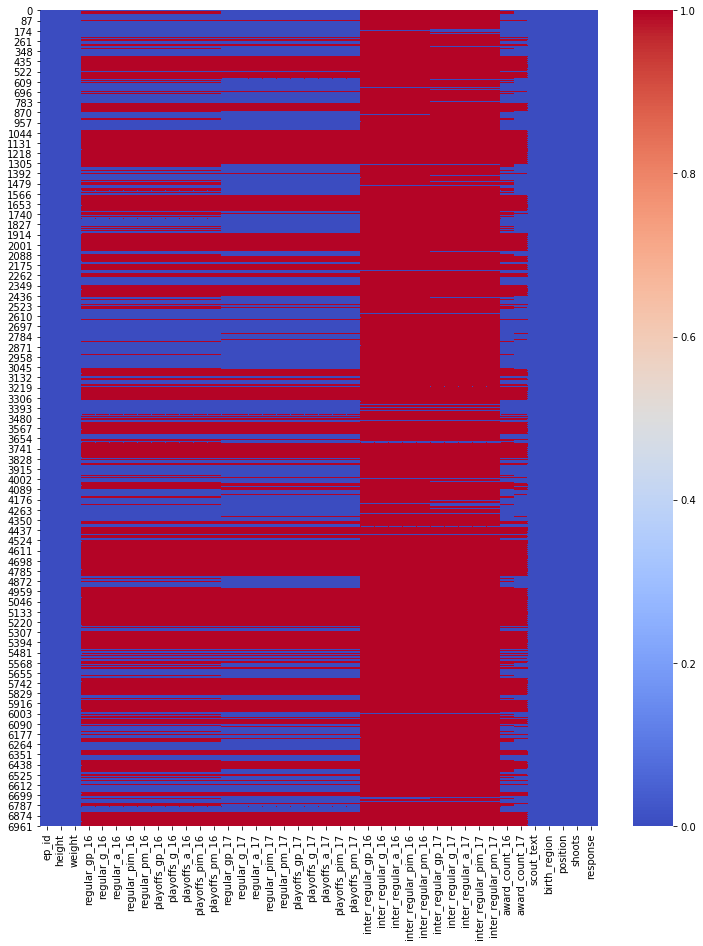

In [23]:
fig, ax = plt.subplots(1, figsize=[12.5, 15])

ax = sns.heatmap(main.isnull(), cmap = 'coolwarm')

plt.show()

### Impute values

In [ ]:
main.columns

In [ ]:
counts = [
    'regular_gp_14', 'regular_g_14', 'regular_a_14', 'regular_pim_14',
    'playoffs_gp_14', 'playoffs_g_14', 'playoffs_a_14', 'playoffs_pim_14',
    'inter_regular_gp_14', 'inter_regular_g_14', 'inter_regular_a_14', 'inter_regular_pim_14',
    'regular_gp_15', 'regular_g_15', 'regular_a_15', 'regular_pim_15',
    'playoffs_gp_15', 'playoffs_g_15', 'playoffs_a_15', 'playoffs_pim_15',
    'inter_regular_gp_15', 'inter_regular_g_15', 'inter_regular_a_15', 'inter_regular_pim_15',
    'regular_gp_16', 'regular_g_16', 'regular_a_16', 'regular_pim_16',
    'playoffs_gp_16', 'playoffs_g_16', 'playoffs_a_16', 'playoffs_pim_16',
    'inter_regular_gp_16', 'inter_regular_g_16', 'inter_regular_a_16', 'inter_regular_pim_16',
    'regular_gp_17', 'regular_g_17', 'regular_a_17', 'regular_pim_17',
    'playoffs_gp_17', 'playoffs_g_17', 'playoffs_a_17', 'playoffs_pim_17',
    'inter_regular_gp_17', 'inter_regular_g_17', 'inter_regular_a_17', 'inter_regular_pim_17',
]

plus_minuses = [
    'regular_pm_14', 'regular_pm_15', 'regular_pm_16', 'regular_pm_17',
    'playoffs_pm_14', 'playoffs_pm_15', 'playoffs_pm_16', 'playoffs_pm_17',
    'inter_regular_pm_14', 'inter_regular_pm_15', 'inter_regular_pm_16', 'inter_regular_pm_17'
]

In [ ]:
main[counts] = main[counts].replace(np.nan, 0)
main[plus_minuses] = main[plus_minuses].replace(np.nan, 0)

In [ ]:
fig, ax = plt.subplots(1, figsize=[12.5, 7])

ax = sns.heatmap(main.isnull(), cbar=False)

plt.show()

## Scouting Reports

In [ ]:
main['scout_text']

In [ ]:
partial = pd.read_csv('scout_text_partial_label.csv').drop('Unnamed: 0', 1)
partial = partial[partial['type'] == 'Yes']
response = main[['ep_id', 'response']]
partial = pd.merge(partial, response, on='ep_id', how='left')

In [ ]:
partial.info()

In [ ]:
partial['scout_text'].sample(20)

In [ ]:
def avg_words(sentence):
    words = sentence.split()
    return round((sum(len(word) for word in words)/len(words)), 2)

In [ ]:
partial['scout_text'] = partial['scout_text'].apply(lambda x: ' '.join(x.lower() for x in x.split()))
partial['scout_text'] = partial['scout_text'].str.replace('[^\w\s]','')
partial['scout_text'] = partial['scout_text'].apply(lambda x: ' '.join(x for x in x.split() if x not in stop))

In [ ]:
partial['word_count'] = partial['scout_text'].apply(lambda x: len(str(x).split(' ')))
partial['char_count'] = partial['scout_text'].str.len()
partial['avg_word'] = partial['scout_text'].apply(lambda x: avg_words(x))
partial['stop_words'] = partial['scout_text'].apply(lambda x: len([x for x in x.split() if x in stop]))
partial['upper'] = partial['scout_text'].apply(lambda x: len([x for x in x.split() if x.isupper()]))

In [ ]:
freq = pd.Series(' '.join(partial['scout_text']).split()).value_counts()[:10]

In [ ]:
freq = list(freq.index)
partial['scout_text'] = partial['scout_text'].apply(lambda x: ' '.join(x for x in x.split() if x not in freq))

In [ ]:
freq = pd.Series(' '.join(partial['scout_text']).split()).value_counts()[-1636:]

In [ ]:
freq = list(freq.index)
partial['scout_text'] = partial['scout_text'].apply(lambda x: ' '.join(x for x in x.split() if x not in freq))

In [ ]:
#partial['scout_text'] = partial['scout_text'].apply(lambda x: str(TextBlob(x).correct()))

In [ ]:
import nltk
nltk.download('punkt')

In [ ]:
TextBlob(partial['scout_text'][1]).words

In [ ]:
st = PorterStemmer()
partial['scout_text'] = partial['scout_text'].apply(lambda x: ' '.join([st.stem(word) for word in x.split()]))

In [ ]:
import nltk
nltk.download('wordnet')

In [ ]:
partial['scout_text'] = partial['scout_text'].apply(lambda x: ' '.join([Word(word).lemmatize() for word in x.split()]))

In [ ]:
partial['sentiment'] = partial['scout_text'].apply(lambda x: TextBlob(x).sentiment[0])

In [ ]:
partial.info()

In [ ]:
partial.sample(10)

In [ ]:
main.info()

In [ ]:
sns.distplot(partial['sentiment'])

In [ ]:
sns.boxplot(partial['response'], partial['sentiment'])

In [ ]:
keep = [
    'ep_id', 'type', 'word_count', 'char_count', 'avg_word', 'stop_words', 'upper', 'sentiment'
]

partial = partial[keep]

In [ ]:
main = pd.merge(main, partial, on='ep_id', how='left')

In [ ]:
main = main[main['type'] == 'Yes']

In [ ]:
sns.heatmap(main.isnull(), cbar=False)

In [ ]:
main.info()

### Inspect and Export

In [ ]:
main_test = main.drop(['ep_id', 'scout_text', 'type'], 1)

In [ ]:
main_test.info()

In [ ]:
main_test.to_csv('main_test.csv')